In [248]:
import pandas as pd
import statsmodels.api as sm
import utilities as ut
import matplotlib.pyplot as plt

# Combining Portfolio and Applying Weights

In [249]:
def current_portfolio_weights():
    portfolio1 = pd.read_csv('weights/max_sharpe_weights.csv', names=['asset', 'max_sharpe'])
    portfolio2 = pd.read_csv('weights/min_vol_weights.csv', names=['asset', 'min_vol'])
    
    result = pd.merge(portfolio1, portfolio2, how='inner')
    
    return result
       
weights = current_portfolio_weights()

In [250]:
def combine_portfolio_raw(data):
    import pandas as pd
    result = pd.DataFrame([])
    for series in data:
        series.index.rename('Date', inplace=True)
        if result.empty == True:
            result = series
        else:
            result = pd.merge(result, series, how='inner', on='Date')     
    return result   

raw_data = ut.clean_data()
portfolio = combine_portfolio_raw(raw_data)
print(portfolio.tail())

            asset1   asset2   asset3   asset4    asset5  asset6  asset7  \
Date                                                                      
2020-07-17  124.36  2379.84  2586.18  2826.75  695.9447  170.12  321.72   
2020-07-20  124.53  2382.52  2587.71  2831.40  699.3873  170.94  324.32   
2020-07-21  124.81  2386.05  2589.26  2851.48  703.5623  173.00  325.01   
2020-07-22  124.81  2388.58  2591.78  2842.14  705.4280  175.63  326.86   
2020-07-23  124.80      NaN      NaN  2801.75       NaN  177.76  324.62   

             asset8   asset9  asset10  
Date                                   
2020-07-17  2586.18  125.110   29.100  
2020-07-20  2587.71  126.370   29.120  
2020-07-21  2589.26  126.060   29.720  
2020-07-22  2591.78  128.670   29.750  
2020-07-23      NaN  128.676   29.585  


In [251]:
def weighted_portfolio(portfolio, weights, type):
    if type == "max_sharpe":
        
        mask = list(weights['max_sharpe'])
        wt_values = (mask * portfolio.dropna())
        portfolio_value = wt_values.sum(axis=1)
        
    elif type == 'min_vol':
        
        mask = list(weights['min_vol'])
        wt_values = (mask * portfolio.dropna())
        portfolio_value = wt_values.sum(axis=1)
        
    else:
        
        weights['min_vol'] = 1 / len(list(weights['min_vol']))
        mask = list(weights['min_vol'])
        wt_values = (mask * portfolio.dropna())
        portfolio_value = wt_values.sum(axis=1)
    
    return portfolio_value
    
    
max_sharpe_portfolio = weighted_portfolio(portfolio, weights, 'max_sharpe')
min_vol_portfolio = weighted_portfolio(portfolio, weights, 'min_vol')
equally_weighted_portfolio = weighted_portfolio(portfolio, weights, 'equal')

# Following Function is called three times for all three portfolios, to see summarizing statistics and histograms

CUMULATIVE OVERALL RETURN (AS %) 96.3
MEAN QUARTERLY RETURN (AS %) 1.19
MEDIAN QUARTERLY RETURN (AS %) 1.19
STANDARD DEVIATION OF QUARTERLY RETURN (AS %) 1.33
SKEWNESS OF QUARTERLY RETURN DISTRIBUTION -0.19
EXCESS KURTOSIS OF QUARTERLY RETURN DISTRIBUTION -0.17


C:\Users\Michael Desai\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Michael Desai\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


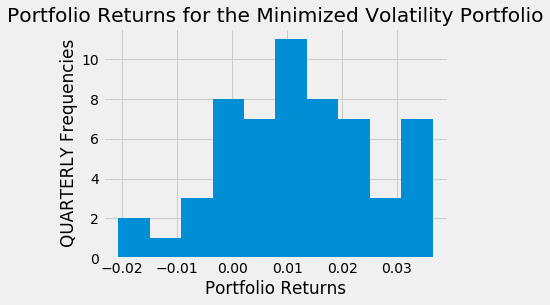

In [252]:
def portfolio_frequency(ts, name, freq):
    
    # want to see very low or negative excess kurtosis
    # want to see positive skew
    # want to see high positive mean return
    # want to see low standard deviation
    
    plt.style.use('fivethirtyeight')
    print("CUMULATIVE OVERALL RETURN (AS %)", round(ts.pct_change().add(1).cumprod().sub(1).mul(100).iloc[-1], 2))
    
    if freq == "daily":
        ts = ts.pct_change()
        
        print("MEAN " + freq.upper() + " RETURN (AS %)", round(ts.mul(100).mean(), 2))
        print("MEDIAN " + freq.upper() + " RETURN (AS %)", round(ts.mul(100).mean(), 2))
        print("STANDARD DEVIATION OF "  + freq.upper() + " RETURN (AS %)", round(ts.mul(100).std(), 2))
        print("SKEWNESS OF " + freq.upper() + " RETURN DISTRIBUTION", round(ts.skew(), 2))
        print('EXCESS KURTOSIS OF ' + freq.upper() + ' RETURN DISTRIBUTION', round(ts.kurt(), 2))
        fig = plt.figure()
        ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
        ax1.hist(ts, bins=40)
        ax1.set_xlabel('Portfolio Returns')
        ax1.set_ylabel( freq.upper() + ' Frequencies')
        ax1.set_title('Portfolio Returns for the ' + name + " Portfolio")
        
    elif freq == "monthly":
        ts = ts.resample('M').mean()
        ts = ts.pct_change()
        
        print("MEAN " + freq.upper() + " RETURN (AS %)", round(ts.mul(100).mean(), 2))
        print("MEDIAN " + freq.upper() + " RETURN (AS %)", round(ts.mul(100).mean(), 2))
        print("STANDARD DEVIATION OF "  + freq.upper() + " RETURN (AS %)", round(ts.mul(100).std(), 2))
        print("SKEWNESS OF " + freq.upper() + " RETURN DISTRIBUTION", round(ts.skew(), 2))
        print('EXCESS KURTOSIS OF ' + freq.upper() + ' RETURN DISTRIBUTION', round(ts.kurt(), 2))
        fig = plt.figure()
        ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
        ax1.hist(ts, bins=20)
        ax1.set_xlabel('Portfolio Returns')
        ax1.set_ylabel( freq.upper() + ' Frequencies')
        ax1.set_title('Portfolio Returns for the ' + name + " Portfolio")
        
    elif freq == 'quarterly':
        ts = ts.resample('Q').mean()
        ts = ts.pct_change()
        
        print("MEAN " + freq.upper() + " RETURN (AS %)", round(ts.mul(100).mean(), 2))
        print("MEDIAN " + freq.upper() + " RETURN (AS %)", round(ts.mul(100).mean(), 2))
        print("STANDARD DEVIATION OF "  + freq.upper() + " RETURN (AS %)", round(ts.mul(100).std(), 2))
        print("SKEWNESS OF " + freq.upper() + " RETURN DISTRIBUTION", round(ts.skew(), 2))
        print('EXCESS KURTOSIS OF ' + freq.upper() + ' RETURN DISTRIBUTION', round(ts.kurt(), 2))
        fig = plt.figure()
        ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
        ax1.hist(ts, bins=10)
        ax1.set_xlabel('Portfolio Returns')
        ax1.set_ylabel( freq.upper() + ' Frequencies')
        ax1.set_title('Portfolio Returns for the ' + name + " Portfolio")
        
    elif freq == 'annual':
        ts = ts.resample('A').mean()
        ts = ts.pct_change()
        
        print("MEAN " + freq.upper() + " RETURN (AS %)", round(ts.mul(100).mean(), 2))
        print("MEDIAN " + freq.upper() + " RETURN (AS %)", round(ts.mul(100).mean(), 2))
        print("STANDARD DEVIATION OF "  + freq.upper() + " RETURN (AS %)", round(ts.mul(100).std(), 2))
        print("SKEWNESS OF " + freq.upper() + " RETURN DISTRIBUTION", round(ts.skew(), 2))
        print('EXCESS KURTOSIS OF ' + freq.upper() + ' RETURN DISTRIBUTION', round(ts.kurt(), 2))
        fig = plt.figure()
        ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
        ax1.hist(ts, bins=7)
        ax1.set_xlabel('Portfolio Returns')
        ax1.set_ylabel( freq.upper() + ' Frequencies')
        ax1.set_title('Portfolio Returns for the ' + name + " Portfolio")
    
    
    

portfolio_frequency(min_vol_portfolio, "Minimized Volatility", 'quarterly')

CUMULATIVE OVERALL RETURN (AS %) 93.8
MEAN QUARTERLY RETURN (AS %) 1.17
MEDIAN QUARTERLY RETURN (AS %) 1.17
STANDARD DEVIATION OF QUARTERLY RETURN (AS %) 1.46
SKEWNESS OF QUARTERLY RETURN DISTRIBUTION -0.0
EXCESS KURTOSIS OF QUARTERLY RETURN DISTRIBUTION -0.15


C:\Users\Michael Desai\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Michael Desai\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


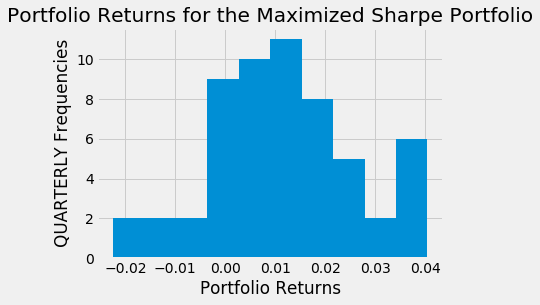

In [253]:
portfolio_frequency(max_sharpe_portfolio, "Maximized Sharpe", 'quarterly')

CUMULATIVE OVERALL RETURN (AS %) 88.36
MEAN QUARTERLY RETURN (AS %) 1.14
MEDIAN QUARTERLY RETURN (AS %) 1.14
STANDARD DEVIATION OF QUARTERLY RETURN (AS %) 2.07
SKEWNESS OF QUARTERLY RETURN DISTRIBUTION -1.44
EXCESS KURTOSIS OF QUARTERLY RETURN DISTRIBUTION 4.97


C:\Users\Michael Desai\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Michael Desai\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


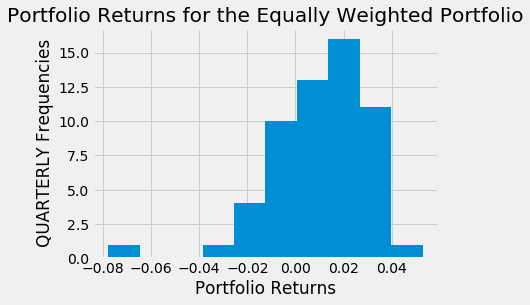

In [254]:
portfolio_frequency(equally_weighted_portfolio, "Equally Weighted", 'quarterly')

# Calculating Annual Sharpe Ratios for each portfolio and visualizing results

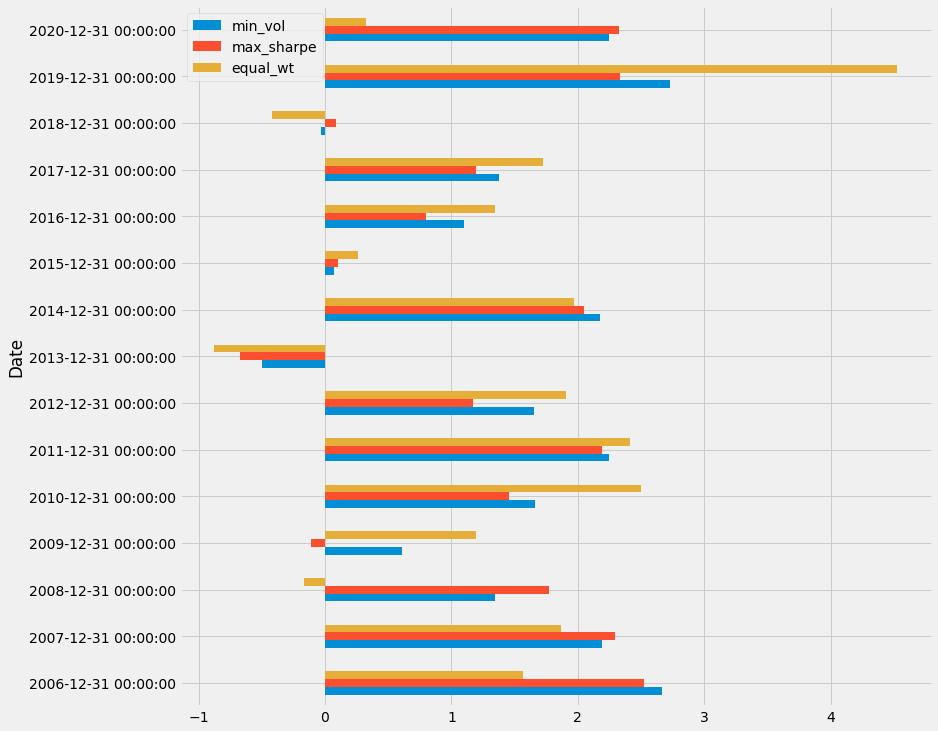

In [255]:
def sharpe_comparison(data, start_date, names, rfr):
    import numpy as np
    
    samples_per_year = 252
    sharpes = pd.DataFrame([])
    
    date = pd.to_datetime(start_date)
    starting_year = date.year
    
    for series in enumerate(data):
        annual_returns = series[1].pct_change().resample('A').mean()
        annual_vol = series[1].pct_change().resample('A').std()
        
        new_series = np.sqrt(samples_per_year) * (annual_returns / annual_vol)
        new_series = new_series.rename(names[series[0]])
        
        if sharpes.empty == True:
            sharpes = new_series
        else: 
            sharpes = pd.merge(sharpes, new_series, how='inner', on='Date');
    
    sharpes.loc[date:].plot.barh(figsize=(12, 12))
    return sharpes
    
    
portfolio_comps = sharpe_comparison([min_vol_portfolio, max_sharpe_portfolio, equally_weighted_portfolio], '2006-01-01', ['min_vol', 'max_sharpe', 'equal_wt'], 0)

# Comparing Cumulative Returns of each portfolio, assuming NO REBALANCING

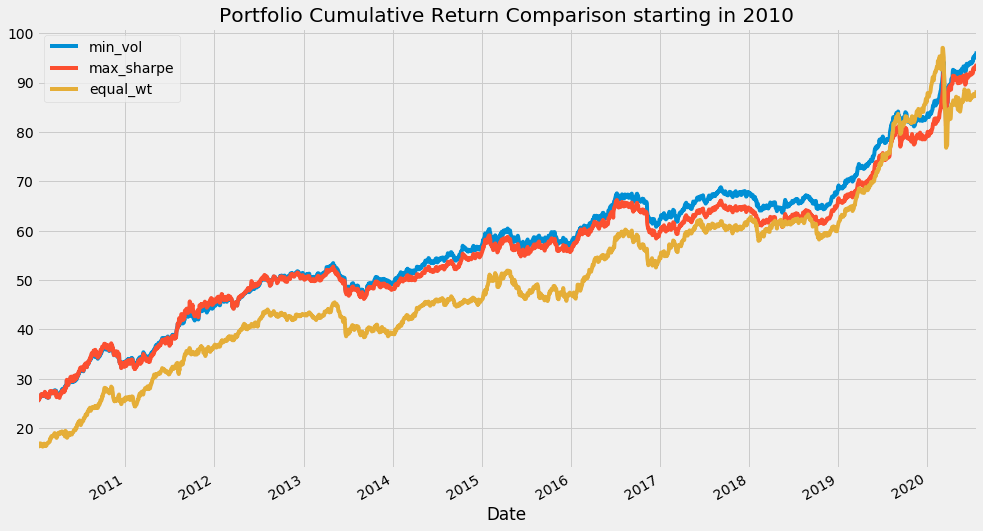

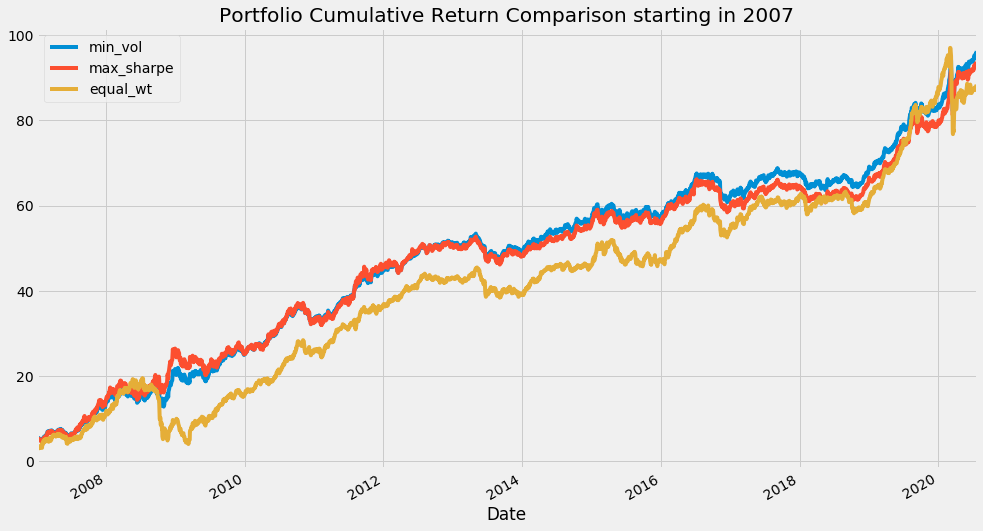

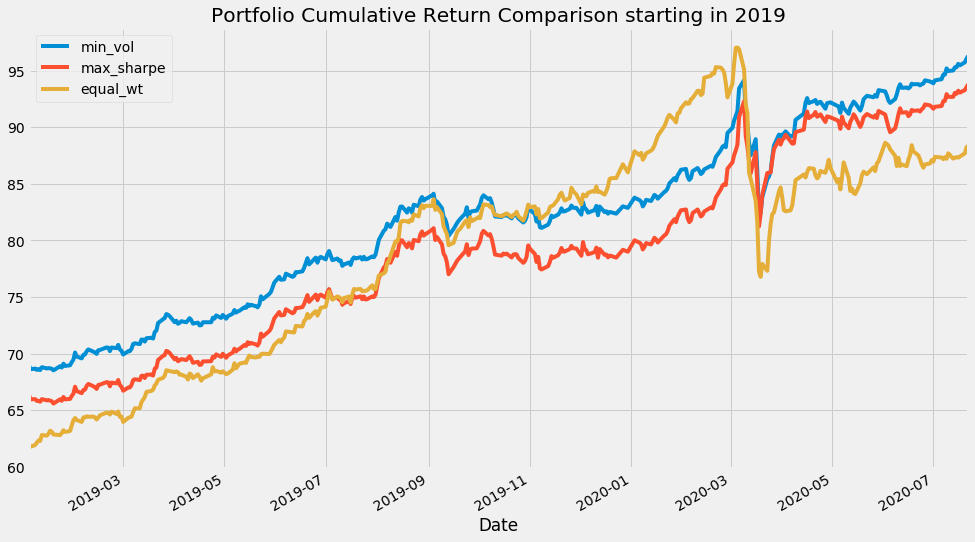

In [256]:
def return_comparison(data, start_date, names):
    # assumes no rebalancing
    
    plt.style.use('fivethirtyeight')
    portfolios = pd.DataFrame([])
    
    date = pd.to_datetime(start_date)
    starting_year = date.year
    
    for series in enumerate(data):
        new_series = round(series[1].pct_change().add(1).cumprod().sub(1).mul(100), 2)
        new_series = new_series.rename(names[series[0]])
                
        if portfolios.empty == True:
            portfolios = new_series
        else: 
            portfolios = pd.merge(portfolios, new_series, how='inner', on='Date')
        
    
    portfolios.loc[date:].plot.line(grid=True, figsize=(15, 9), title='Portfolio Cumulative Return Comparison starting in ' + str(starting_year))
        
    
return_comparison([min_vol_portfolio, max_sharpe_portfolio, equally_weighted_portfolio], '2010-01-01', ['min_vol', 'max_sharpe', 'equal_wt'])
return_comparison([min_vol_portfolio, max_sharpe_portfolio, equally_weighted_portfolio], '2007-01-01', ['min_vol', 'max_sharpe', 'equal_wt'])
return_comparison([min_vol_portfolio, max_sharpe_portfolio, equally_weighted_portfolio], '2019-01-01', ['min_vol', 'max_sharpe', 'equal_wt'])